# Problem statement:

Idioms make up part of why natural languages are ambigious in meaning. This is why identifying idiomatic meaning in n-grams is an important NLP task in applications such as, for example, sentiment analysis and machine translation.

# Import libraries:

In [136]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from nltk import ngrams
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
import re
import string

import spacy
import en_core_web_sm
spacy_en_model = en_core_web_sm.load()
#spacy_en_model = spacy.load('en_core_web_sm') - doesn't work, problem is related to the way spaCy detects installed packages

from sklearn import preprocessing

# Data gathering:

In [19]:
import requests
from bs4 import BeautifulSoup

from string import ascii_lowercase

## Web-scrape English idiom list:

In [20]:
def scrape_7esl():
    
    eng_idioms = []
    
    url = "https://7esl.com/english-idioms/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        
        idiom_alphabet_list = soup.find('div', {'class':'elementor-toggle'})
        
        for idiom_tab in idiom_alphabet_list.find_all('tr'):
            try:
                idiom = idiom_tab.find('strong')
                eng_idioms.append(idiom.get_text())
            except Exception:
                pass
                    
    return eng_idioms
    

In [21]:
def scrape_usingenglish():
    
    eng_idioms = []
    
    for letter in ascii_lowercase:
        url = "https://www.usingenglish.com/reference/idioms/{}.html".format(letter)
        response = requests.get(url)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
        
            for idiom in soup.find_all('li', {'class' : 'list-group-item'}):
                try:
                    idiom_text = idiom.get_text()
                    eng_idioms.append(idiom_text)
                except Exception:
                    pass
                
        for i in range(2, 10):
            try:
                url = "https://www.usingenglish.com/reference/idioms/{}.html?page={}".format(letter, i)
                response = requests.get(url)

                if response.status_code == 200:
                    soup = BeautifulSoup(response.text, "html.parser")

                    for idiom in soup.find_all('li', {'class' : 'list-group-item'}):
                        try:
                            idiom_text = idiom.get_text()
                            eng_idioms.append(idiom_text)
                        except Exception:
                            pass
            except Exception:
                pass
                
                    
    return eng_idioms
    

In [22]:
idiom_list_7esl = scrape_7esl()
idiom_list_usingenglish = scrape_usingenglish()

idiom_list = idiom_list_7esl + idiom_list_usingenglish

In [64]:
idiom_list[:10]

['A Bit Much',
 'A Bite at The Cherry',
 'A Busy Bee',
 'A Cat Has Nine Lives',
 'A Cat in Gloves Catches No Mice',
 'A Cat Nap',
 'A Cold Day In July',
 'A Cold Fish',
 'A Cut Above',
 'A Cut Below']

In [65]:
idioms_df = pd.DataFrame({'Sentence': '',
              'N-gram' : idiom_list, 
                'Idiom' : 1
              })

In [66]:
idioms_df.sample(10)

,Sentence,N-gram,Idiom
466,,Drink the Kool-Aid,1
3566,,"Like father, like son",1
1229,,Take The Mickey (Piss) (Out Of Someone),1
5407,,Written in stone,1
1041,,Rank and File,1
3355,,Jump ship,1
2627,,Flowery speech,1
189,,Back in the Day,1
2085,,Champagne taste on a beer budget,1
3730,,Memory like an elephant,1


## Web-scrape list of non-idiomatic n-grams:

Here I am web-scraping the Project Gutenberg publication of A Christmas Carol by Charles Dickens (https://www.gutenberg.org/files/46/46-0.txt), before splitting the text up into n-grams of length 2-5. I am preserving the sentence of each n-gram for context, should it become useful in the project.

In [24]:
def book_scrape():
    
    url = "https://www.gutenberg.org/files/46/46-0.txt"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        
        book_text = soup.get_text()
        
        # Clean book text
        book_text = re.sub(r'\r+', ' ', book_text)
        book_text = re.sub(r'\n+', ' ', book_text)
        book_text = re.sub(r'\s+', ' ', book_text)
        book_text = book_text.split('MARLEY\'S GHOST')[1]
        book_text = book_text.split('End of the Project Gutenberg EBook')[0]
        
    else:
        book_text = ''
    
    return book_text
    

In [25]:
book_text = book_scrape()

In [67]:
import random

book_sents = []
n_grams = []

for sent in sent_tokenize(book_text):
    words = word_tokenize(sent)
    
    n = random.randint(2, 5)
    
    grams = ngrams(words, n)
    for gram in grams:
        book_sents.append(sent)
        n_grams.append(' '.join(gram))
    #words = word_tokenize(sent):
        
        #book_sents.append(sent)
        #n_grams.append(n_gram)
    

In [68]:
non_idioms_df = pd.DataFrame({'Sentence': book_sents,
              'N-gram' : n_grams, 
                'Idiom' : 0
              })

In [69]:
non_idioms_df.sample(10)

,Sentence,N-gram,Idiom
10924,"Away they all went, twenty couple at once; han...",; old top couple always,0
7627,It was a strange figure--like a child: yet not...,so like,0
9589,"The panels shrunk, the windows cracked; fragme...",how all this was,0
11689,"The happiness he gives, is quite as great as i...",quite as great,0
14496,Its dark brown curls were long and free; free ...,open hand,0
24828,"Sheets and towels, a little wearing apparel, t...","sugar-tongs , and a few",0
27822,He paused to look round before entering.,to look round,0
1416,"""There are many things from which I might have...",", I dare",0
1896,"""There's another fellow,"" muttered Scrooge; wh...",; who overheard him :,0
28370,"Heaven, and the Christmas Time be praised for ...",for this,0


In [70]:
data = pd.concat([idioms_df, non_idioms_df])
# Shuffle DataFrame rows
data = data.sample(frac=1)

In [71]:
data.sample(10)

,Sentence,N-gram,Idiom
4028,,On the rocks,1
900,,Neck and Neck,1
10070,Here he produced a decanter of curiously light...,", who answered that he",0
867,,Make Hay (While the Sun Shines),1
11643,He has the power to render us happy or unhappy...,happy or unhappy ; to,0
3495,,Lay waste,1
24882,"If you asked me for another penny, and made it...",I 'd repent of being,0
25571,"Oh cold, cold, rigid, dreadful Death, set up t...","cold , cold , rigid",0
12665,The noise in this room was perfectly tumultuou...,every child was conducting itself,0
14471,"Its feet, observable beneath the ample folds o...",", set here and there",0


# Preprocessing and feature engineering:

## Clean text:

In [72]:
pd.options.display.max_colwidth = 150
data.iloc[0:20]

,Sentence,N-gram,Idiom
2328,,Dirty dog,1
3580,"The hair was curiously stirred, as if by breath or hot air; and, though the eyes were wide open, they were perfectly motionless.",they were perfectly,0
27135,"""On which,"" said Bob, ""for he is the pleasantest-spoken gentleman you ever heard, I told him.","you ever heard , I",0
17872,"""I see a vacant seat,"" replied the Ghost, ""in the poor chimney-corner, and a crutch without an owner, carefully preserved.","the Ghost , `` in",0
5427,"""It is required of every man,"" the Ghost returned, ""that the spirit within him should walk abroad among his fellowmen, and travel far and wide; an...",wide ; and if that,0
2653,,For Pete's sake,1
8560,"cried Scrooge with fervour; ""I could walk it blindfold.""",Scrooge with,0
9279,And the Sultan's Groom turned upside down by the Genii; there he is upon his head!,the Genii ; there he,0
14201,"The crisp leaves of holly, mistletoe, and ivy reflected back the light, as if so many little mirrors had been scattered there; and such a mighty b...","time ,",0
1204,"Scrooge having no better answer ready on the spur of the moment, said, ""Bah!""","said ,",0


In [78]:
# Remove columns with punctuation in n-gram
data = data[~data['N-gram'].apply(lambda x: any(c in string.punctuation for c in x))]

In [85]:
# Remove columns with no alpha characters in n-gram
data = data[data['N-gram'].apply(lambda x: any(c.isalpha() for c in x))]

In [120]:
# Remove columns with numeric characters in n-gram
data = data[~data['N-gram'].apply(lambda x: any(c.isdigit() for c in x))]

In [121]:
data.shape

(20636, 4)

In [96]:
data.sample(5)

,Sentence,N-gram,Idiom
21770,"Here is a glass of mulled wine ready to our hand at the moment; and I say, 'Uncle Scrooge!'""",I say,0
30630,His own heart laughed: and that was quite enough for him.,own heart,0
1939,"They were portly gentlemen, pleasant to behold, and now stood, with their hats off, in Scrooge's office.",They were,0
24719,"A seal or two, a pencil-case, a pair of sleeve-buttons, and a brooch of no great value, were all.",A seal or two,0
1291,,Turn Something on Its Head,1


In [99]:
def custom_preprocessor(text):
    
    # Make text lowercase
    text = text.lower()
    
    # Remove elisionse
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "cannot", text)
    
    # Expand abbreviations
    # TO DO
    
    # Remove accents
    #text = unidecode.unidecode(text)
    
    # Remove non-word characters
    text = re.sub("\W"," ",text)
    
    # Remove line breaks
    text = re.sub('\n', '', text)
    
    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    # Remove more than one whitespace
    text = re.sub(r" +", " ", text)
    
    # Standardize elongated vowels:
    '''
    text_list = []
    for word in text.split(' '):
        elong_vowels = re.search(r'(\w)\1{2,}', word)
        if elong_vowels:
            word_shortened_two = re.sub(r'(\w)\1{2,}', r'\1\1', word)
            word_shortened_one = re.sub(r'(\w)\1{2,}', r'\1', word)
            if word_shortened_two in words.words():
                text_list.append(word_shortened_two)
            elif word_shortened_one in words.words():
                text_list.append(word_shortened_one)
            else:
                text_list.append(word)
        else:
            text_list.append(word)
    text = ' '.join(text_list)
    '''
    
    return text

In [100]:
demo_phrase = 'Turn Something on Its Head	'

In [101]:
custom_preprocessor(demo_phrase)

'turn something on its head '

In [105]:
data['N-gram_cleaned'] = data['N-gram'].apply(lambda x : custom_preprocessor(x))

C:\Users\MdeCL\Anaconda3\envs\MyEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
data.iloc[0:20]

,Sentence,N-gram,Idiom,N-gram_cleaned
2328,,Dirty dog,1,dirty dog
3580,"The hair was curiously stirred, as if by breath or hot air; and, though the eyes were wide open, they were perfectly motionless.",they were perfectly,0,they were perfectly
8560,"cried Scrooge with fervour; ""I could walk it blindfold.""",Scrooge with,0,scrooge with
1183,"""What right have you to be dismal?",have you to be dismal,0,have you to be dismal
13174,"And now Scrooge looked on more attentively than ever, when the master of the house, having his daughter leaning fondly on him, sat down with her a...",at his own fireside,0,at his own fireside
2863,"The owner of one scant young nose, gnawed and mumbled by the hungry cold as bones are gnawed by dogs, stooped down at Scrooge's keyhole to regale ...",down at Scrooge,0,down at scrooge
28565,I am as giddy as a drunken man.,a drunken,0,a drunken
2060,,Casting vote,1,casting vote
12166,"That which promised happiness when we were one in heart, is fraught with misery now that we are two.",now that we,0,now that we
8056,"Perhaps, Scrooge could not have told anybody why, if anybody could have asked him; but he had a special desire to see the Spirit in his cap; and b...",asked him,0,asked him


## Optional extra preprocessing:

In [15]:
# Remove stop words except 'not' and 'can'
stop_words = set(stopwords.words('english'))  

def remove_stop_words(text):
    word_tokens = word_tokenize(text) 
    filtered_sent = ' '.join([w for w in word_tokens if not w in stop_words or w in ['not', 'can']])
    return filtered_sent

all_data['text_no_sw'] = all_data['text_cleaned'].apply(lambda x : remove_stop_words(x))

In [16]:
# Lemmatize text
def lem(text):
    lemmed_sent = []
    doc = spacy_en_model(text)
    for token in doc:
        if token.lemma_ != '-PRON-':
            lemmed_sent.append(token.lemma_)
    lemmed_sent = ' '.join(lemmed_sent)

    return lemmed_sent

In [17]:
lem('our deeds are the reason of this earthquake may allah forgive us all')

'deed be the reason of this earthquake may allah forgive all'

In [18]:
all_data['text_lemmatized'] = all_data['text_cleaned'].apply(lambda x : lem(x))
all_data['text_no_sw_lemmatized'] = all_data['text_no_sw'].apply(lambda x : lem(x))

## Training-test split:

In [108]:
# Select type of preprocessed text to use
text_type = 'N-gram_cleaned'

X = data[text_type]
Y = data['Idiom']

In [109]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1)

## Vectorize text:

In [122]:
# Create word index
import keras
from keras.preprocessing import sequence, text

token = text.Tokenizer(num_words=None)
max_len = 70

token.fit_on_texts(list(xtrain) + list(xtest))

xtrain_seq = token.texts_to_sequences(xtrain)
xtest_seq = token.texts_to_sequences(xtest)

# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)

word_index = token.word_index

In [123]:
word_index

{'the': 1,
 'a': 2,
 'of': 3,
 'to': 4,
 'in': 5,
 'and': 6,
 'it': 7,
 'was': 8,
 'his': 9,
 'he': 10,
 'that': 11,
 'with': 12,
 'on': 13,
 'as': 14,
 'have': 15,
 'had': 16,
 'your': 17,
 'for': 18,
 'i': 19,
 'you': 20,
 'at': 21,
 'not': 22,
 'were': 23,
 'him': 24,
 'be': 25,
 'all': 26,
 'by': 27,
 'one': 28,
 'up': 29,
 'is': 30,
 'out': 31,
 'they': 32,
 'scrooge': 33,
 'its': 34,
 'upon': 35,
 'from': 36,
 'so': 37,
 'their': 38,
 'no': 39,
 'an': 40,
 'this': 41,
 'like': 42,
 'but': 43,
 'would': 44,
 'down': 45,
 'which': 46,
 'if': 47,
 'there': 48,
 'what': 49,
 'man': 50,
 'when': 51,
 'time': 52,
 'into': 53,
 'them': 54,
 'me': 55,
 'been': 56,
 'off': 57,
 'very': 58,
 'my': 59,
 'than': 60,
 'could': 61,
 'or': 62,
 'christmas': 63,
 'before': 64,
 'spirit': 65,
 'good': 66,
 'ghost': 67,
 'little': 68,
 'her': 69,
 'about': 70,
 'are': 71,
 'see': 72,
 's': 73,
 'said': 74,
 'own': 75,
 'more': 76,
 'do': 77,
 'old': 78,
 'go': 79,
 'someone': 80,
 'through': 81,
 

In [137]:
# Create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 96))
for word, i in word_index.items():
    embedding_vector = spacy_en_model(word)[0].vector
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
np.savetxt("C:\\Users\\MdeCL\\Desktop\\Idiom-Classification-Project\\embedding_matrix.csv", embedding_matrix, delimiter=",")

In [138]:
embedding_matrix = np.loadtxt('C:\\Users\\MdeCL\\Desktop\\Idiom-Classification-Project\\embedding_matrix.csv', delimiter=",")

# Model selection and training:

## Baseline model:

## Deep learning model:

In [141]:
from keras.utils import np_utils

# Binarise labels for neural network
ytrain_enc = np_utils.to_categorical(ytrain)
ytest_enc = np_utils.to_categorical(ytest)

In [142]:
from keras.models import Sequential

from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization

from keras.callbacks import EarlyStopping

In [150]:
# A simple LSTM with embeddings and one dense layer
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     96,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
# model.add(Dropout(0.2))
model.add(LSTM(96))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

In [151]:
import keras.optimizers
from keras.optimizers import Adam
opt = keras.optimizers.Adam(learning_rate=0.0002)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [152]:
# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [153]:
history = model.fit(xtrain_pad,
          y=ytrain_enc,
          batch_size=64,
          epochs=8,
          verbose=1,
          validation_data=(xtest_pad, ytest_enc),
          callbacks=[earlystop]
         )

Epoch 1/8
291/291 [==============================] - 14s 48ms/step - loss: 0.3662 - accuracy: 0.8354 - val_loss: 0.2802 - val_accuracy: 0.8813
Epoch 2/8
291/291 [==============================] - 14s 48ms/step - loss: 0.2647 - accuracy: 0.8894 - val_loss: 0.2517 - val_accuracy: 0.8939
Epoch 3/8
291/291 [==============================] - 14s 47ms/step - loss: 0.2358 - accuracy: 0.9027 - val_loss: 0.2335 - val_accuracy: 0.9046
Epoch 4/8
291/291 [==============================] - 13s 45ms/step - loss: 0.2184 - accuracy: 0.9099 - val_loss: 0.2230 - val_accuracy: 0.9138
Epoch 5/8
291/291 [==============================] - 14s 48ms/step - loss: 0.2027 - accuracy: 0.9174 - val_loss: 0.2091 - val_accuracy: 0.9133
Epoch 6/8
291/291 [==============================] - 14s 49ms/step - loss: 0.1907 - accuracy: 0.9226 - val_loss: 0.2060 - val_accuracy: 0.9172
Epoch 7/8
291/291 [==============================] - 15s 50ms/step - loss: 0.1788 - accuracy: 0.9288 - val_loss: 0.2011 - val_accuracy: 0.9225

<AxesSubplot:>

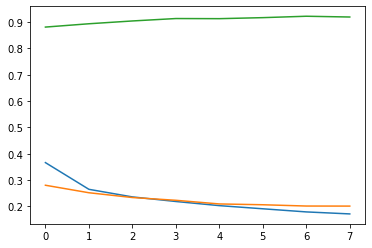

In [155]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()
history_df['val_loss'].plot()
history_df['val_accuracy'].plot()

## Make predictions:

In [156]:
xtest

29838           give him so much
900          see the dingy cloud
3338               jog my memory
7022     have got into the works
11325                   again to
                  ...           
7159                  to and fro
7823                the occasion
11770           again stood side
1417                  i dare say
627              implored him to
Name: N-gram_cleaned, Length: 2064, dtype: object

In [157]:
ytest

29838    0
900      0
3338     1
7022     0
11325    0
        ..
7159     0
7823     0
11770    0
1417     0
627      0
Name: Idiom, Length: 2064, dtype: int64

In [199]:
#demo_data = xtest.sample(20)
demo_data = pd.Series(['mutton dressed as lamb'])

x_val_seq = token.texts_to_sequences(demo_data)
x_val_pad = sequence.pad_sequences(x_val_seq, maxlen=max_len)

prediction = model.predict_classes(x_val_pad)

output = pd.DataFrame({'n-gram': demo_data, 'target': prediction})
print(output)

                   n-gram  target
0  mutton dressed as lamb       1
